# Crowd Funding Data Analysis for Kickstarter

Presented by : Aparna Nair | Divya Datla | Radhika Rajeevan | Similoluwa Adelore

## 1. Project Overview : Crowd Funding Data Analysis for Kickstarter

### CrowdFunding

Crowdfunding is a concept of collecting funds from people , on a public platform for a particular cause. The cause can be initated as a campaign or a project which is launched globally, for instance on a website. This website can be made accessible to the contributers who wish to pledge any amount for a cause from anywhere across the world. The pledged amount could be contributions made for social causes or funds for startups.

### Kickstarter

Kickstarter is a one of the crowdfunding websites that is focused on encouraging creativity. It hosts projects across a wide range of categories thereby providing a public platform for the campaign or project owners to intiate their cause.

Access website here : https://www.kickstarter.com/

### Goal

In this project we would like to analyze the success rate of a campaign hosted on kicstarter. Some of the questions that we would like to address are :

1. What are the factors contributing towards the success or failure of a project?
2. For a campaign owner to launch a project, what parameters should be considered in order for it to be a success ?

### Audience

We are aiming for this analysis will be useful to people who are interested in raising funds for their cause, so that they can decide the amount that should be set as their goal and the timeline within which this goal can be achieved, in order to have a successful campaign.

### Source of data

This analysis is based on datasets that is obtained by webscrapping services provided by WebRobots.

1. Using the WebRobots tools, information is extracted from the Kickstarter website.
2. There were 56 files from years 2009 to 2019.
3. All of the 56 files were merged into a single file and some unwanted columns dropped before cleaning the data further.

## 2. Scope of Analysis :


### Understanding Data :

Below is a preview of Kickstarter. To give a brief on the features we are focusing on :

1. The 'State' column which defines the status of the Project hosted on kickstarter for which funds are being raised. The     'Project Status' can be one of the following : Successful, Failed, Suspended and Cancelled. 

2. Every project that is hosted on the Kickstarter website has the a target 'Goal' Amount (USD scaled to thousands) and a 'Timeline' (number of days to achieve the target goal). 

3. The contributors are the 'backers' which who pledge amounts that they wish to , in order to support the campaign. In other words, the 'Pledged' Amount is the amount of donations made. 

4. Contributors can pledge amounts until the deadline date. 

### Objective :

Our analysis aims at building a classification model to predict the success or failure of a new project with a given goal and timeline. Further, we attempt to predict ranges that goal and timelines can be modified to prevent a project from failing.

## 3. Data Cleaning and Merging

#### Importing important python libraries to carry out this analysis

In [6]:
#import all important libraries

#Data cleaning 
import glob
import pandas as pd
import pandas_profiling
import numpy as np
import datetime as dt
import ast 
import re
import math 
import os
import jupyter_contrib_nbextensions

#ignore warnings
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

#Exploratory Data Analysis 
from scipy import stats
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

#Machine Learning

#Hypothesis testing
from scipy.stats import ttest_ind

#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

#Cross Validation
from sklearn import model_selection

#Linear Regression
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

#Decision Trees
from sklearn.tree import DecisionTreeRegressor
#from sklearn.cross_validation import cross_val_score, crossvalidation
from sklearn.model_selection import cross_val_score, ShuffleSplit
#from sklearn.model_selection import crossvalidation

#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

#### 3.1 Reading multiple files into one

In [7]:
path = r'C:\Users\Radhika\Anaconda3\Data Science Project\Dataset\Files' # use your path
all_files = glob.glob(path + "/*.csv")

files = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    files.append(df)

frame = pd.concat(files, axis=0, ignore_index=True)

#Preview Data
frame.head()

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,103,"Funding the mixing, mastering, and promotion o...","{""id"":39,""name"":""Hip-Hop"",""slug"":""music/hip-ho...",5612,US,1456593666,"{""id"":1531055178,""name"":""JC Stroebel and Henry...",USD,$,True,...,john-chuck-and-the-class-debut-ep,https://www.kickstarter.com/discover/categorie...,True,True,successful,1459964983,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",5612.0,domestic
1,318,We follow the challenges and achievements of g...,"{""id"":30,""name"":""Documentary"",""slug"":""film & v...",26237,US,1495058182,"{""id"":652875854,""name"":""Matthew Temple"",""is_re...",USD,$,True,...,girls-of-summer-big-diamond-dreams,https://www.kickstarter.com/discover/categorie...,True,True,successful,1499054401,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",26237.0,domestic
2,0,Task No.1 is inspired by the history and expre...,"{""id"":38,""name"":""Electronic Music"",""slug"":""mus...",0,GB,1357630802,"{""id"":1699678150,""name"":""Sonny Phillips"",""slug...",GBP,£,False,...,task-no1,https://www.kickstarter.com/discover/categorie...,False,False,failed,1362937678,1.614583,"{""web"":{""project"":""https://www.kickstarter.com...",0.0,international
3,22,MAJOR KEY ALERT - Future Heroes is a Denver ra...,"{""id"":39,""name"":""Hip-Hop"",""slug"":""music/hip-ho...",1575,US,1455591114,"{""id"":518056209,""name"":""Future Heroes"",""is_reg...",USD,$,True,...,future-heroes-sxsw-is-calling,https://www.kickstarter.com/discover/categorie...,True,False,successful,1457935201,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1575.0,domestic
4,17,We're traveling to Rhode Island to film Mako a...,"{""id"":30,""name"":""Documentary"",""slug"":""film & v...",3290,US,1465224753,"{""id"":632937188,""name"":""Ryan Walton"",""is_regis...",USD,$,True,...,pelagic-shark-diving-shoot,https://www.kickstarter.com/discover/categorie...,True,False,successful,1467825676,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",3290.0,domestic


#### Selecting features from Webscrapped data

In [8]:
df_kickstarter = frame[["state","id","created_at","launched_at","deadline","category","country","currency","current_currency","fx_rate","static_usd_rate","goal","usd_pledged","location","backers_count","urls"]]
df_kickstarter.head()

,state,id,created_at,launched_at,deadline,category,country,currency,current_currency,fx_rate,static_usd_rate,goal,usd_pledged,location,backers_count,urls
0,successful,1023090679,1456593666,1457376583,1459964983,"{""id"":39,""name"":""Hip-Hop"",""slug"":""music/hip-ho...",US,USD,USD,1.000000,1.000000,5000.0,5612.0,"{""id"":2452078,""name"":""Minneapolis"",""slug"":""min...",103,"{""web"":{""project"":""https://www.kickstarter.com..."
1,successful,1225553537,1495058182,1496759560,1499054400,"{""id"":30,""name"":""Documentary"",""slug"":""film & v...",US,USD,USD,1.000000,1.000000,24042.0,26237.0,"{""id"":2442047,""name"":""Los Angeles"",""slug"":""los...",318,"{""web"":{""project"":""https://www.kickstarter.com..."
2,failed,688464571,1357630802,1357753678,1362937678,"{""id"":38,""name"":""Electronic Music"",""slug"":""mus...",GB,GBP,USD,1.205592,1.614583,4000.0,0.0,"{""id"":26734,""name"":""Liverpool"",""slug"":""liverpo...",0,"{""web"":{""project"":""https://www.kickstarter.com..."
3,successful,1502047884,1455591114,1456250581,1457935200,"{""id"":39,""name"":""Hip-Hop"",""slug"":""music/hip-ho...",US,USD,USD,1.000000,1.000000,500.0,1575.0,"{""id"":2391279,""name"":""Denver"",""slug"":""denver-c...",22,"{""web"":{""project"":""https://www.kickstarter.com..."
4,successful,1096433232,1465224753,1465233675,1467825675,"{""id"":30,""name"":""Documentary"",""slug"":""film & v...",US,USD,USD,1.000000,1.000000,2500.0,3290.0,"{""id"":2457078,""name"":""Narragansett"",""slug"":""na...",17,"{""web"":{""project"":""https://www.kickstarter.com..."


#### 3.2 Data types and conversions

In [9]:
print(df_kickstarter.dtypes)

#factor conversions
df_kickstarter['id'] = df_kickstarter['id'].astype(object)

state                object
id                    int64
created_at            int64
launched_at           int64
deadline              int64
category             object
country              object
currency             object
current_currency     object
fx_rate             float64
static_usd_rate     float64
goal                float64
usd_pledged         float64
location             object
backers_count         int64
urls                 object
dtype: object


##### 3.2.1 Date conversions

In [10]:
#date conversions
df_kickstarter["created_at"] = pd.to_datetime(df_kickstarter["created_at"],unit='s')
df_kickstarter["created_at"]= df_kickstarter["created_at"].dt.date

df_kickstarter["launched_at"] = pd.to_datetime(df_kickstarter["launched_at"],unit='s')
df_kickstarter["launched_at"]= df_kickstarter["launched_at"].dt.date

df_kickstarter["deadline"] = pd.to_datetime(df_kickstarter["deadline"],unit='s')
df_kickstarter["deadline"]= df_kickstarter["deadline"].dt.date

#Splitting Created_at date into year and month 
df_kickstarter[['lauchedat_year','lauchedat_month']] = df_kickstarter.launched_at.apply(lambda x : pd.Series(x.strftime("%Y,%m").split(",")))
df_kickstarter[['deadline_year','deadline_month']] = df_kickstarter.deadline.apply(lambda x : pd.Series(x.strftime("%Y,%m").split(",")))

df_kickstarter["launched_at"] = pd.to_datetime(df_kickstarter["launched_at"])
df_kickstarter["deadline"] = pd.to_datetime(df_kickstarter["deadline"])
df_kickstarter["created_at"] = pd.to_datetime(df_kickstarter["created_at"])

df_kickstarter['month_deadline'] = pd.to_datetime(df_kickstarter['deadline'], format='%m').dt.month_name().str.slice(stop=3)
df_kickstarter['month_launched'] = pd.to_datetime(df_kickstarter['launched_at'], format='%m').dt.month_name().str.slice(stop=3)

##### 3.2.2 Extract category

In [11]:
# looping all records and extracting category
array_cat = df_kickstarter["category"].values
rows = len(array_cat)
i=0
#array_cat_names=[]
category=[]
sub_category=[]
print(rows)
print(i)


while i <=(rows-1):
    str_temp = array_cat[i]
    tuple_temp = ast.literal_eval(str_temp)
    dict_temp = dict(tuple_temp)
 #   print(dict_temp["name"])
 #   array_cat_names.append(dict_temp["name"])
    if('/' in dict_temp['slug']):
        cat = dict_temp["slug"].split('/',2)
        category.append(cat[0])
        sub_category.append(cat[1])
    else :
        category.append(dict_temp['slug'])
        sub_category.append(dict_temp['slug'])
    i=i+1
#    print(i)

#drop old category
df_kickstarter = df_kickstarter.drop(columns="category")

#insert new category
df_kickstarter.insert(4,"category",category)
df_kickstarter.insert(5,"sub_category",sub_category)

52397
0


##### 3.2.3 Extract Location

In [12]:
# looping all records and extracting location
array_loc = df_kickstarter["location"].values
rows = len(array_loc)
i=0
array_loc_names=[]
print(rows)
print(i)


while i <=(rows-1):
    if( pd.isnull(array_loc[i]) ):
        array_loc_names.append('NA')
        i=i+1
    else:
        loc=re.search('"name":"(.*)","slug"',array_loc[i])
        array_loc_names.append(loc.group(1))
        i=i+1
        
len(array_loc_names)  

#drop old location
df_kickstarter = df_kickstarter.drop(columns="location")

#insert new location
df_kickstarter.insert(6,"city",array_loc_names) 

52397
0


##### 3.2.4 Calculating Timeline

In [13]:
#calculating number of days
no_days=df_kickstarter['deadline']-df_kickstarter['launched_at']

#inserting timeline
df_kickstarter.insert(4,"timeline",no_days.dt.days) 

##### 3.2.5 Currency Conversion

In [14]:
usd_goal = df_kickstarter['goal'] * df_kickstarter['static_usd_rate']
df_kickstarter.insert(13,"usd_goal",usd_goal) 

# Scale the pledged amount and goal for interpretable plots and stats

df_kickstarter['usd_pledged'] = df_kickstarter['usd_pledged']/1000
df_kickstarter['usd_goal'] =  df_kickstarter['usd_goal'] / 1000

##### 3.2.6 Extracting URL for case study

In [15]:
print(df_kickstarter["urls"].head())

# looping all records and extracting urls
array_url = df_kickstarter["urls"].values
rows = len(array_url)
i=0
#array_cat_names=[]
web_url=[]
rewards_url=[]
print(rows)
print(i)


while i <=(rows-1):
    str_temp = array_url[i]
    tuple_temp = ast.literal_eval(str_temp)
    dict_temp = dict(tuple_temp)
 #   print(dict_temp["name"])
 #   array_cat_names.append(dict_temp["name"])
    web_url.append(dict_temp['web']['project'])
    rewards_url.append(dict_temp['web']['rewards'])
    i=i+1
#    print(i)

print(len(web_url))
print(len(rewards_url))

#insert the URLS
df_kickstarter.insert(14,"web_url",web_url) 
df_kickstarter.insert(15,"rewards_url",rewards_url) 

df_kickstarter = df_kickstarter.drop(columns="urls")

0    {"web":{"project":"https://www.kickstarter.com...
1    {"web":{"project":"https://www.kickstarter.com...
2    {"web":{"project":"https://www.kickstarter.com...
3    {"web":{"project":"https://www.kickstarter.com...
4    {"web":{"project":"https://www.kickstarter.com...
Name: urls, dtype: object
52397
0
52397
52397


##### 3.3 Preview of Cleaned Data and Saving Merged file

In [16]:
# Preview cleaned data and save into a file
df_kickstarter.head()

,state,id,created_at,launched_at,timeline,category,sub_category,city,deadline,country,...,static_usd_rate,goal,usd_pledged,backers_count,lauchedat_year,lauchedat_month,deadline_year,deadline_month,month_deadline,month_launched
0,successful,1023090679,2016-02-27,2016-03-07,30,music,hip-hop,Minneapolis,2016-04-06,US,...,1.000000,5000.0,5.612,103,2016,03,2016,04,Apr,Mar
1,successful,1225553537,2017-05-17,2017-06-06,27,film & video,documentary,Los Angeles,2017-07-03,US,...,1.000000,24042.0,26.237,318,2017,06,2017,07,Jul,Jun
2,failed,688464571,2013-01-08,2013-01-09,60,music,electronic music,Liverpool,2013-03-10,GB,...,1.614583,4000.0,0.000,0,2013,01,2013,03,Mar,Jan
3,successful,1502047884,2016-02-16,2016-02-23,20,music,hip-hop,Denver,2016-03-14,US,...,1.000000,500.0,1.575,22,2016,02,2016,03,Mar,Feb
4,successful,1096433232,2016-06-06,2016-06-06,30,film & video,documentary,Narragansett,2016-07-06,US,...,1.000000,2500.0,3.290,17,2016,06,2016,07,Jul,Jun


In [ ]:
#Saving the file for reference
#df_kickstarter.to_csv('C:\\Users\\Radhika\\Anaconda3\\Data Science Project\\Dataset\\cleaned\\Files'+'CleanedData.csv')

## 4. Exploratory Data Analysis

After cleaning the data i.e, extracting the features from webscrapped data, converting date and numeric columns to appropriate formats, the file is merged to excel and is now ready for exploratory data analysis.

1. Trends of Project Status in the time frame of 9 years
2. Proportions of Successful and Failed projects per category and geographical location
3. Scatterplots to understand relationships between features

In [18]:
# Reading the merged file

# set path
path=r"C:\Users\Radhika\Anaconda3\Data Science Project\Dataset\cleaned\Merged"
cwd=os.chdir(path)

# read the file
df_merge = pd.read_csv("MergedDataNov.csv",index_col=0)

# check rows and colums
print("Number of observations and feautres in dataset : ")
print(df_merge.shape)

Number of observations and feautres in dataset : 
(207621, 26)


In [44]:
#Removing Duplicates
# Sort by Project ID
df_merge.sort_values('id',inplace=True)

# Drop the duplicateds
df_merge.drop_duplicates(subset='id',keep='first', inplace=True)

#Check the final count
print("Dimensions after removing duplicates")
print(df_merge.shape)
df_merge[['state','category','country','launched_at','timeline','usd_goal','usd_pledged','backers_count']].head()

Dimensions after removing duplicates
(182634, 26)


,state,category,country,launched_at,timeline,usd_goal,usd_pledged,backers_count
164816,successful,art,GB,2015-04-07,29,0.223731,0.258036,11
129747,failed,food,US,2015-10-27,30,20.000000,0.776000,18
55770,failed,fashion,CA,2015-06-15,45,14.614375,2.271723,42
72719,failed,food,US,2018-08-22,60,2.500000,0.096000,3
3826,successful,food,US,2016-05-16,45,2.500000,3.239000,68


Note : After removing duplicates the dataset contains total of 182634 rows and 26 columns. Duplciates are removed after data cleaning so that raw data can be carefully reviewed in its interpretable format before unknowingly deleting records.

## 4.1. Project status trendlines

There are 5 states of projects on Kickstarter. They are,
1. Successful
2. Failed
3. Suspended
4. Live
5. Cancelled
 
The trendlines of these projects are observed below.

In [20]:
df_merge['state'].unique()

array(['successful', 'failed', 'live', 'canceled', 'suspended'],
      dtype=object)

#### 4.1.1 Trendlines : Creating Pivot table

In [23]:
trend_state = pd.DataFrame({'count' : df_merge.groupby( ['lauchedat_year','lauchedat_month','launched_at','state'] )['id'].size()}).reset_index()
trend_state=trend_state.pivot_table(trend_state, index=('lauchedat_year','lauchedat_month','launched_at'), columns='state')
trend_state.columns=trend_state.columns.droplevel(0)
trend_state.columns.name=None
trend_state=trend_state.reset_index()
trend_state.head()

#Replacing NaN with 0
trend_state=trend_state.fillna(0)
#trend_state.head()

#Converting to monthly time series
trends = trend_state[['launched_at','canceled','failed','live','successful','suspended']]
trends['launched_at']=pd.to_datetime(trends['launched_at'])
trends=trends.resample('M',on='launched_at').sum()
trends.head()

,canceled,failed,live,successful,suspended
launched_at,,,,,
2009-04-30,0.0,1.0,0.0,3.0,0.0
2009-05-31,0.0,3.0,0.0,9.0,0.0
2009-06-30,0.0,0.0,0.0,5.0,0.0
2009-07-31,0.0,1.0,0.0,9.0,0.0
2009-08-31,2.0,3.0,0.0,11.0,0.0


In [24]:
trends.tail()

,canceled,failed,live,successful,suspended
launched_at,,,,,
2019-04-30,75.0,691.0,0.0,1668.0,4.0
2019-05-31,89.0,885.0,0.0,1757.0,5.0
2019-06-30,68.0,604.0,240.0,1548.0,5.0
2019-07-31,50.0,249.0,1793.0,806.0,3.0
2019-08-31,14.0,2.0,1552.0,11.0,3.0


#### 4.1.2 Trendlines : Project Status

Text(0.5, 0, 'Years')

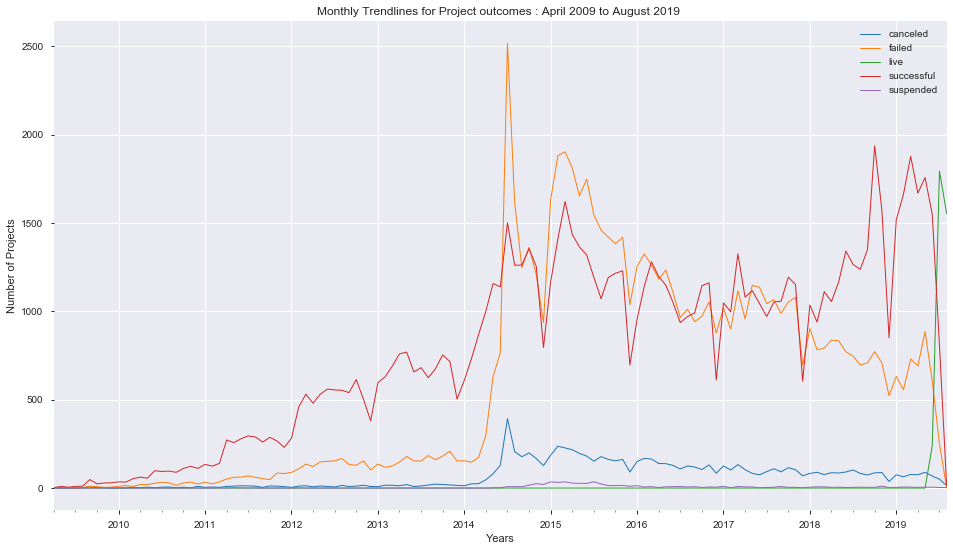

In [25]:
ax=trends[['canceled','failed','live','successful','suspended']].plot(linewidth=1,figsize=(16,9),title='Monthly Trendlines for Project outcomes : April 2009 to August 2019 ')
ax.set_ylabel('Number of Projects')
ax.set_xlabel('Years')

#### Trend Analysis : Project Status : Change in patterns

The above trend lines represent the monthly volume of projects hosted on kickstarter from April 2009 to August 2019.

1. From years 2010 to 2014 the projects hosted on Kicstarter were increaseing owing to its popularity has a crowdfunding platform. The number of failed an successful projects were both on the rise, although the successfull projects were significantly higher than the failed ones.

2. In the year 2014, the failure of projects was noticibly higher. 

3. The failure trends of projects continued to dominate over the successful trends uptil 2016.

4. From 2016 to end of 2017 , two years, rate of failure and success of projects were similar. 

5. Since 2018, the past year, there is an improvement in the chances of projects turning to be successful being higher and the failure trends dropping. 

6. We also observe a seasonal dip in the success of projects every year towards the end. We will analyze the seasonality patterns in further detail during timeseries analysis. 


#### 4.1.3  Proportions of Projects based on Status
Percentage of projects that are successful, failed,live and suspended are calculated to understand the data better.

In [26]:
# % calculations
counts = df_merge[['id','state']].groupby(['state']).count()
percentage_count =( counts / df_merge['id'].count())*100
percentage_count

,id
state,
canceled,4.630025
failed,40.076875
live,1.962942
successful,52.984110
suspended,0.346047


Note :
1. 52% of the Projects are successful.
2. 40% of the Projects have failed

## 4.2. Project Proportions : State and Category wise

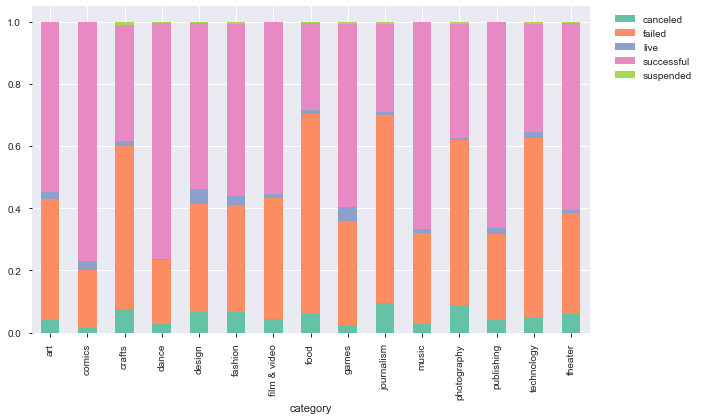

In [46]:
df_pct = (df_merge.groupby(['category','state'])['id'].count()/df_merge.groupby(['category'])['id'].count())
# plot the stacked plot
pal = sns.color_palette("Set2")
df_pct.unstack().plot.bar(stacked=True,figsize=(10,6),colors=pal)

plt.legend(loc='upper right', bbox_to_anchor=(1.2,1.))



### Inference of Categorical Classification

1. The proportions of successful projects are higher for categories like 'Dance', 'Comics', 'Music' and 'Publishing'
2. The proportions of failed projects are higher for categories like 'food' , 'journalism' and 'techonology'

As a result , we might want to infer that Kickstarter is a good platform for Dancers, Comic writers and Musicians to raise funds for their talent. Unfortunately the projects for Food or Technology are not very popluar among the crowd.

### 4.2.1 Project Proportions : State and Location wise

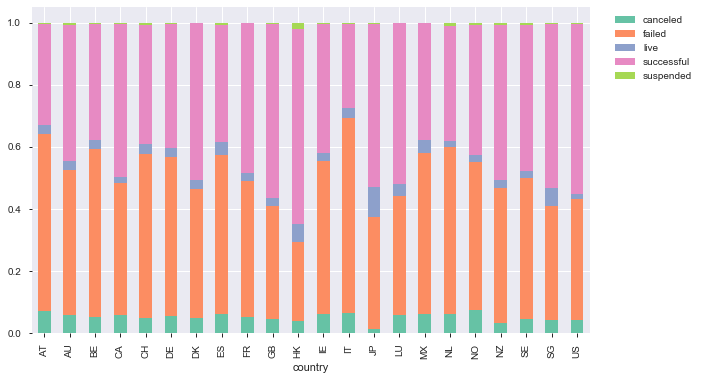

In [47]:
df_pct = (df_merge.groupby(['country','state'])['id'].count()/df_merge.groupby(['country'])['id'].count())
# plot the stacked plot
pal = sns.color_palette("Set2")
df_pct.unstack().plot.bar(stacked=True,figsize=(10,6),colors=pal)

plt.legend(loc='upper right', bbox_to_anchor=(1.2,1.))


### Inference of Country-wise Classification

1. The proportions of successful projects are higher for categories like 'Hong Kong', 'Great Britain', 'United States
2. The proportions of failed projects are higher for categories like 'Italy', 'Austria','Belgium', 'China'

As a result , we might want to infer that Kickstarter has good amount of contributors for Projects initiated from Asian countries , US and Great Britian.

## 4.3 Distribution of numeric data

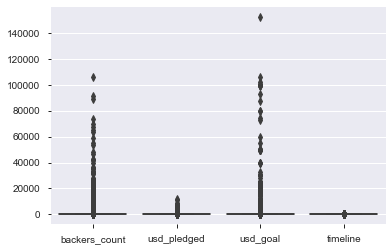

In [34]:
ax=sns.boxplot(data=df_merge[['backers_count','usd_pledged','usd_goal','timeline']])
#ax.set_yscale('log')

In [28]:
df_merge[['backers_count','usd_pledged','usd_goal','timeline']].describe()

,backers_count,usd_pledged,usd_goal,timeline
count,182634.000000,182634.000000,182634.000000,182634.000000
mean,134.904558,11.909222,44.344580,32.996556
std,887.837872,93.176624,1172.704627,11.973383
min,0.000000,0.000000,0.000010,1.000000
25%,3.000000,0.075000,1.500000,30.000000
50%,23.000000,1.272504,5.000000,30.000000
75%,81.000000,5.977831,14.000000,35.000000
max,105857.000000,12143.435670,152350.076000,92.000000


Note: 
1. Each numeric feature have different variance and are on differnt scales. For instance, timeline has smaller values compared to pledged and goal amounts

2. Scaled Pledged and Goal amoutns in USD are extremely high indicating special cases of unrealistically high amounts.
3. Minimum values of each of backers count, pledged and goal amounts is 0.
4. Minimum timeline is 1 day.


### 4.3.1 Removing Unusual cases

### Univariate Distributions

       backers_count       timeline    usd_pledged       usd_goal
count  182634.000000  182634.000000  182634.000000  182634.000000
mean      134.904558      32.996556      11.909222      44.344580
std       887.837872      11.973383      93.176624    1172.704627
min         0.000000       1.000000       0.000000       0.000010
25%         3.000000      30.000000       0.075000       1.500000
50%        23.000000      30.000000       1.272504       5.000000
75%        81.000000      35.000000       5.977831      14.000000
max    105857.000000      92.000000   12143.435670  152350.076000


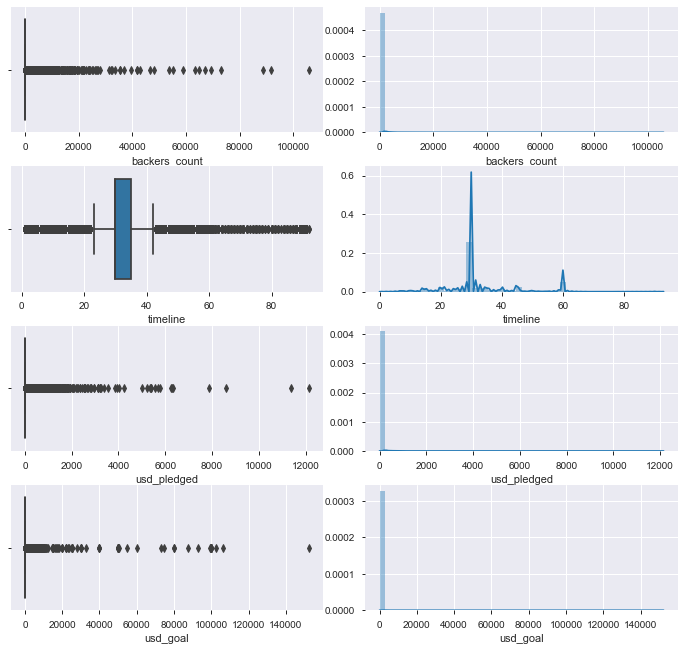

In [35]:
#subplot settings
fig, axes = plt.subplots(nrows=4,ncols=2,figsize=(10,9))

fig.tight_layout()
#fig.subplots_adjust(hspace=1)

sns.boxplot(df_merge['backers_count'],ax=axes[0][0])
sns.distplot(df_merge['backers_count'], ax=axes[0][1])

sns.boxplot(df_merge['timeline'],ax=axes[1][0])
sns.distplot(df_merge['timeline'], ax=axes[1][1])

sns.boxplot(df_merge['usd_pledged'],ax=axes[2][0])
sns.distplot(df_merge['usd_pledged'], ax=axes[2][1])

sns.boxplot(df_merge['usd_goal'],ax=axes[3][0])
sns.distplot(df_merge['usd_goal'], ax=axes[3][1])

df_merge_summary = df_merge[['backers_count', 'timeline','usd_pledged','usd_goal']].describe()
print(df_merge_summary)

#### Converting USD amounts back to orginial form

In [50]:
# Scaling Goal and Pledged amount back to USD
df_merge['usd_goal']= df_merge['usd_goal']*1000
df_merge['usd_pledged']= df_merge['usd_pledged']*1000


In [54]:
# Removing all data <= 1

#check for records where USD goal = 1 and remove

cond_goal = df_merge['usd_goal'] <= 1
cond_state = df_merge['state'] == 'successful'
print(df_merge[cond_goal & cond_state].shape)
p = round(  ((len(df_merge[cond_goal & cond_state])/len(df_merge))*100 ) , 2)
print("Proportion :  %s %%\n" % p)
df_merge[cond_goal & cond_state][['state','category','country','launched_at','timeline','usd_goal','usd_pledged','backers_count']].head()


(217, 26)
Proportion :  0.12 %



,state,category,country,launched_at,timeline,usd_goal,usd_pledged,backers_count
191604,successful,art,US,2009-10-06,15,1.000000,144.000000,5
83039,successful,film & video,US,2016-03-15,30,1.000000,597.000000,26
147063,successful,publishing,US,2015-09-12,30,1.000000,39.000000,11
10706,successful,comics,US,2017-01-03,45,1.000000,1539.000000,71
22153,successful,comics,AU,2019-01-30,18,0.716763,2819.256827,140


In [58]:
df_merge[cond_goal].groupby(['lauchedat_year','state'])['id'].count()

lauchedat_year  state     
2009            successful     2
2010            failed         1
2011            canceled       1
                failed         1
                successful     3
2012            successful     9
2013            successful     4
2014            canceled       6
                failed         2
                successful    27
2015            canceled       4
                failed         5
                successful    59
                suspended      2
2016            canceled       1
                failed         3
                successful    34
                suspended      1
2017            failed         2
                successful    29
2018            canceled       1
                successful    30
2019            canceled       2
                live           7
                successful    20
Name: id, dtype: int64

In [59]:
# remove goal <= 1 day
cond = df_merge['usd_goal'] > 1
df_merge = df_merge[cond]
print("Count after removing Goal <= 1")
print(df_merge.shape)

# remove timeline <= 1 day
cond_days = df_merge['timeline'] > 1
df_merge = df_merge[cond_days]
print("Count after removing Timeline <= 1")
print(df_merge.shape)

# remove backers <= 1
cond_backers = df_merge['backers_count']> 1
df_merge = df_merge[cond_backers]
print("Count after removing Backers <= 1")
print(df_merge.shape)

# remove pledged <= 1
cond_pledged = df_merge['usd_pledged'] > 1
df_merge=df_merge[cond_pledged]
print("Count after removing Pledged <= 1")
print(df_merge.shape)

Count after removing Goal <= 1
(182378, 26)
Count after removing Timeline <= 1
(182323, 26)
Count after removing Backers <= 1
(150115, 26)
Count after removing Pledged <= 1
(150114, 26)


## 4.4 Outliers Treatment

Removing outliers based on z-score to retain 90% of the data

#### 4.4.1 Outliers Treatment : Goal Amount in  (USD) 

In [64]:
outliers = df_merge[(np.abs(stats.zscore(df_merge['usd_goal'])) >= 3 )]
outliers.sort_values('usd_goal',inplace=True)
print("Total Outlier observations :")
print(outliers.shape)
p_out_usd = round(  ((len(outliers)/len(df_merge))*100 ) , 2)
print("Proportion of Outliers : %s %%\n" % p_out_usd)
print(outliers[['usd_goal','timeline','backers_count','usd_pledged']].describe())
print(outliers[['id','launched_at','category','sub_category','country','usd_goal','timeline','backers_count','usd_pledged','state','web_url']].head())

#remove the outliers
outliers_sub = df_merge[(np.abs(stats.zscore(df_merge['usd_goal'])) >=3 )]
df_merge = df_merge[ ~df_merge.index.isin(outliers_sub.index) ]
print("Observations after removing outliers (USD Goal) : ")
print(df_merge.shape)


Total Outlier observations :
(116, 26)
Proportion of Outliers : 0.08 %

           usd_goal    timeline  backers_count   usd_pledged
count  1.160000e+02  116.000000     116.000000    116.000000
mean   1.459262e+07   44.525862      15.224138   2087.008043
std    2.172233e+07   16.747465      77.385212   6945.884596
min    2.310516e+06    3.000000       2.000000      1.474962
25%    3.027590e+06   30.000000       2.000000     21.000000
50%    5.640173e+06   51.000000       3.000000    118.000000
75%    1.196449e+07   60.000000       6.000000    448.159297
max    1.059990e+08   61.000000     823.000000  53793.500000
Observations after removing outliers (USD Goal) : 
(149998, 26)


In [63]:
outliers[['id','launched_at','category','sub_category','country','usd_goal','timeline','backers_count','usd_pledged','state','web_url']].tail()

,id,launched_at,category,sub_category,country,usd_goal,timeline,backers_count,usd_pledged,state,web_url
42854,492821983,2015-05-29,design,architecture,US,80000000.0,59,3,36.000000,failed,https://www.kickstarter.com/projects/415792963...
171764,1366997820,2014-12-15,art,public art,NL,87237089.1,12,7,16289.657023,failed,https://www.kickstarter.com/projects/204175115...
76542,1741515953,2015-12-21,journalism,video,US,100000000.0,30,4,13.000000,suspended,https://www.kickstarter.com/projects/188225284...
61536,208731425,2017-09-10,art,painting,US,100000000.0,60,2,59.000000,failed,https://www.kickstarter.com/projects/kylesouth...
193059,2132015082,2017-01-13,film & video,movie theaters,DE,105999014.0,60,2,38.159645,failed,https://www.kickstarter.com/projects/635433513...


#### 4.4.2 Outliers Treatment : Pledged Amount  (USD) 

In [65]:
outliers = df_merge[(np.abs(stats.zscore(df_merge['usd_pledged'])) >= 3 )]
outliers.sort_values('usd_pledged',inplace=True)
print("Total Outlier observations :")
print(outliers.shape)
p_out_usd = round(  ((len(outliers)/len(df_merge))*100 ) , 2)
print("Proportion of Outliers : %s %%\n" % p_out_usd)
print(outliers[['usd_goal','timeline','backers_count','usd_pledged']].describe())

#remove the outliers
outliers_sub = df_merge[(np.abs(stats.zscore(df_merge['usd_pledged'])) >=3 )]
df_merge = df_merge[ ~df_merge.index.isin(outliers_sub.index) ]
print("Observations after removing outliers (USD Pledged) : ")
print(df_merge.shape)

outliers[['id','launched_at','category','sub_category','country','usd_goal','timeline','backers_count','usd_pledged','state','web_url']].head()

Total Outlier observations :
(842, 26)
Proportion of Outliers : 0.56 %

           usd_goal    timeline  backers_count   usd_pledged
count  8.420000e+02  842.000000     842.000000  8.420000e+02
mean   1.265942e+05   36.186461    6930.730404  8.640691e+05
std    2.215655e+05   10.695867   10060.954571  1.019917e+06
min    7.900000e+01    8.000000     102.000000  3.224208e+05
25%    3.000000e+04   30.000000    1991.250000  4.159050e+05
50%    5.000000e+04   32.000000    4110.500000  5.792112e+05
75%    1.063661e+05   44.000000    8045.750000  8.761307e+05
max    2.000000e+06   60.000000  105857.000000  1.214344e+07
                id launched_at     category     sub_category country  \
183513   485694124  2014-09-30  photography      photography      US   
96685     22930761  2014-01-22   technology  diy electronics      US   
176039  1200751126  2019-08-13       design   product design      US   
120776  1505505450  2019-03-07       comics      comic books      US   
157341     9005823 

#### 4.4.3 Outliers Treatment : Backers Count 

In [ ]:
outliers = df_merge[(np.abs(stats.zscore(df_merge['backers_count'])) >= 3 )]
outliers.sort_values('backers_count',inplace=True)
print("Total Outlier observations :")
print(outliers.shape)
p_out_usd = round(  ((len(outliers)/len(df_merge))*100 ) , 2)
print("Proportion of Outliers : %s %%\n" % p_out_usd)
print(outliers[['usd_goal','timeline','backers_count','usd_pledged']].describe())

#remove the outliers
outliers_sub = df_merge[(np.abs(stats.zscore(df_merge['backers_count'])) >=3 )]
df_merge = df_merge[ ~df_merge.index.isin(outliers_sub.index) ]
print("Observations after removing outliers (backers_count) : ")
print(df_merge.shape)

outliers[['id','launched_at','category','sub_category','country','usd_goal','timeline','backers_count','usd_pledged','state','web_url']].head()

#### 4.4.4 Outliers Treatment : Timeline

In [70]:
outliers = df_merge[(np.abs(stats.zscore(df_merge['timeline'])) >= 3 )]
outliers.sort_values('timeline',inplace=True)
print("Total Outlier observations :")
print(outliers.shape)
p_out_usd = round(  ((len(outliers)/len(df_merge))*100 ) , 2)
print("Proportion of Outliers : %s %%\n" % p_out_usd)
print(outliers[['usd_goal','timeline','backers_count','usd_pledged']].describe())

#remove the outliers
outliers_sub = df_merge[(np.abs(stats.zscore(df_merge['timeline'])) >=3 )]
df_merge = df_merge[ ~df_merge.index.isin(outliers_sub.index) ]
print("Observations after removing outliers (timeline) : ")
print(df_merge.shape)

outliers[['id','launched_at','category','sub_category','country','usd_goal','timeline','backers_count','usd_pledged','state','web_url']].head()

Total Outlier observations :
(366, 26)
Proportion of Outliers : 0.25 %

            usd_goal    timeline  backers_count    usd_pledged
count     366.000000  366.000000     366.000000     366.000000
mean     6918.868855   84.581967      62.265027    5499.038891
std     15989.342346    7.452689      95.182237   11923.864091
min        99.000000   68.000000       2.000000       2.000000
25%      2000.000000   80.000000      16.250000     908.000000
50%      3500.000000   89.000000      37.000000    2569.000000
75%      7000.000000   90.000000      73.750000    5711.750000
max    196642.868400   92.000000    1139.000000  126683.084438
Observations after removing outliers (timeline) : 
(146380, 26)


,id,launched_at,category,sub_category,country,usd_goal,timeline,backers_count,usd_pledged,state,web_url
85404,640446101,2010-01-04,art,conceptual art,US,15000.0,68,54,6018.0,failed,https://www.kickstarter.com/projects/848741702...
39789,1611886740,2010-02-21,music,jazz,US,2000.0,68,36,2179.0,successful,https://www.kickstarter.com/projects/helengill...
62914,280665682,2011-06-08,music,jazz,US,2500.0,68,55,2510.0,successful,https://www.kickstarter.com/projects/andrecann...
22151,1183347744,2010-04-08,journalism,journalism,US,2350.0,68,56,3526.0,successful,https://www.kickstarter.com/projects/laynemosl...
189111,1096260682,2010-03-12,film & video,animation,US,4000.0,68,53,4010.0,successful,https://www.kickstarter.com/projects/juna/fat-...


## 4.5 Log Transformation of Numeric Features

Log transformations additionally scale the data on the log scale.

       log_backers_count   log_timeline  log_usd_pledged   log_usd_goal
count      146380.000000  146380.000000    146380.000000  146380.000000
mean            3.445465       3.416278         7.362454       8.326029
std             1.554201       0.377814         2.168141       1.633553
min             0.693147       0.693147         0.019203       0.048019
25%             2.302585       3.401197         6.095825       7.313220
50%             3.555348       3.401197         7.703443       8.450052
75%             4.564348       3.526361         8.890135       9.381025
max             7.095064       4.204693        12.679388      14.571202


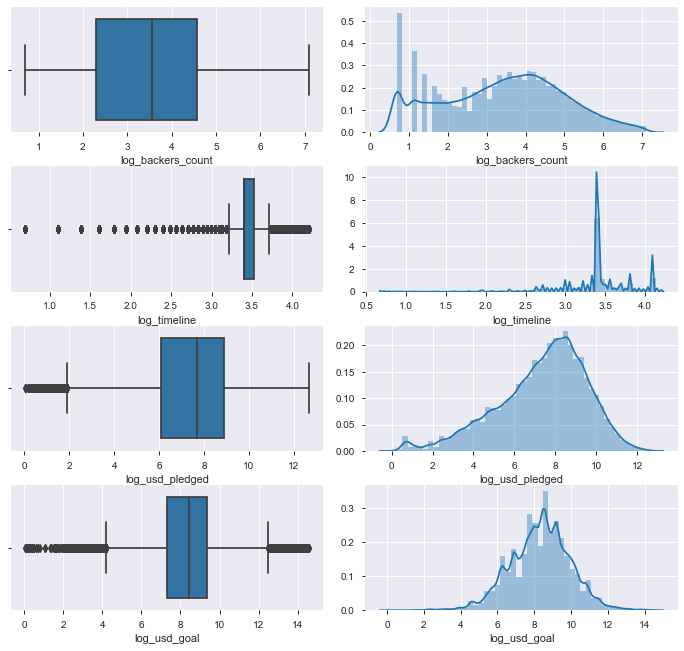

In [71]:
to_log = ['backers_count', 'timeline','usd_pledged','usd_goal']
df_log = df_merge[to_log].applymap(lambda x: np.log(x))

df_log.columns = 'log_' + df_log.columns

# univariate analysis of Successful projects after removing outliers

#subplot settings
fig, axes = plt.subplots(nrows=4,ncols=2,figsize=(10,9))

fig.tight_layout()
#fig.subplots_adjust(hspace=1)

sns.boxplot(df_log['log_backers_count'],ax=axes[0][0])
sns.distplot(df_log['log_backers_count'], ax=axes[0][1])

sns.boxplot(df_log['log_timeline'],ax=axes[1][0])
sns.distplot(df_log['log_timeline'], ax=axes[1][1])

sns.boxplot(df_log['log_usd_pledged'],ax=axes[2][0])
sns.distplot(df_log['log_usd_pledged'], ax=axes[2][1])

sns.boxplot(df_log['log_usd_goal'],ax=axes[3][0])
sns.distplot(df_log['log_usd_goal'], ax=axes[3][1])

df_log_summary = df_log[['log_backers_count', 'log_timeline','log_usd_pledged','log_usd_goal']].describe()
print(df_log_summary)

#### Inference

## 4.6. Bivariate Analysis 

### 4.6.1 Scatter plot : Comparision of Failed and Successful Projects

In [73]:
#seperate Successful and Failed Projects
df_log.insert(1,"state",df_merge['state'])
print(df_log.shape)
df_success = df_log.query('state == "successful" ' )
df_fail = df_log.query(' state == "failed" ')

(146380, 5)


Text(0, 0.5, 'Pledged $ )')

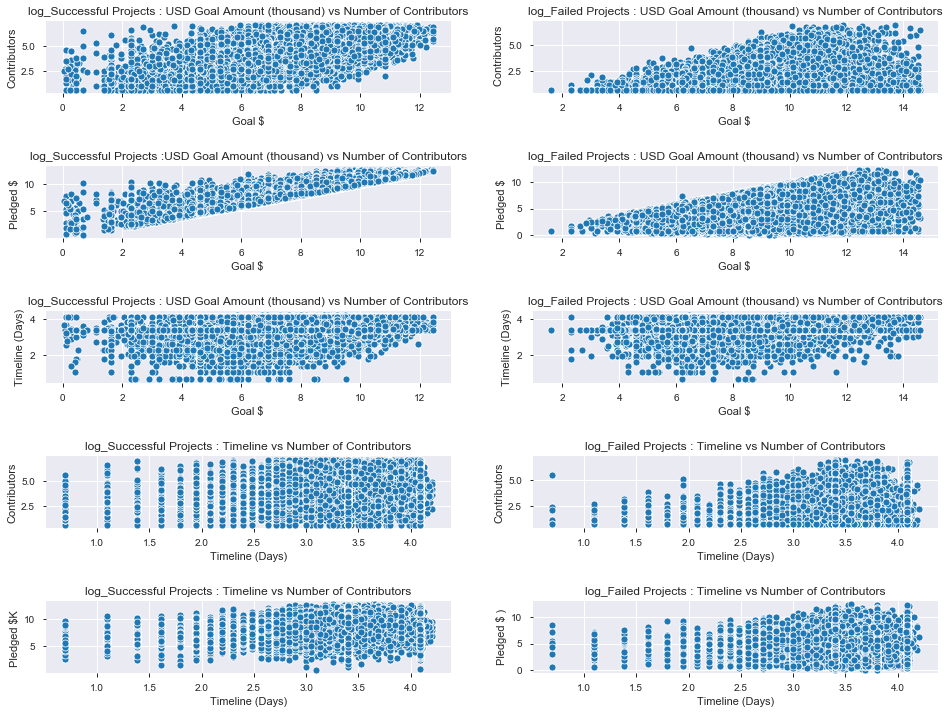

In [74]:
#Correlations and Subplots for Goal Amount and Number of Contributors for log transformed data 

#subplot settings
fig, axes = plt.subplots(nrows=5,ncols=2,figsize=(16,12))

#fig.tight_layout()
fig.subplots_adjust(hspace=1)

#control factors : Goal and Timeline

#Goal : Backers
#Goal : pledged
#Goal : Timeline (trend)
#Timeline : Backers
#Timeline : Pledged

#scatterplot

sns.scatterplot(x="log_usd_goal", y="log_backers_count", data= df_success, ax=axes[0][0])
axes[0][0].set_title('log_Successful Projects : USD Goal Amount (thousand) vs Number of Contributors')
axes[0][0].set_xlabel(' Goal $ ')
axes[0][0].set_ylabel('Contributors')

sns.scatterplot(x="log_usd_goal", y="log_backers_count", data= df_fail, ax=axes[0][1])
axes[0][1].set_title('log_Failed Projects : USD Goal Amount (thousand) vs Number of Contributors')
axes[0][1].set_xlabel('Goal $ ')
axes[0][1].set_ylabel(' Contributors')

sns.scatterplot(x="log_usd_goal", y="log_usd_pledged", data= df_success, ax=axes[1][0])
axes[1][0].set_title('log_Successful Projects :USD Goal Amount (thousand) vs Number of Contributors')
axes[1][0].set_xlabel('Goal $ ')
axes[1][0].set_ylabel('Pledged $ ')


sns.scatterplot(x="log_usd_goal", y="log_usd_pledged", data= df_fail, ax=axes[1][1])
axes[1][1].set_title('log_Failed Projects : USD Goal Amount (thousand) vs Number of Contributors')
axes[1][1].set_xlabel('Goal $ ')
axes[1][1].set_ylabel('Pledged $ ')


sns.scatterplot(x="log_usd_goal", y="log_timeline", data= df_success, ax=axes[2][0])
axes[2][0].set_title('log_Successful Projects : USD Goal Amount (thousand) vs Number of Contributors')
axes[2][0].set_xlabel('Goal $ ')
axes[2][0].set_ylabel('Timeline (Days)')

sns.scatterplot(x="log_usd_goal", y="log_timeline", data= df_fail, ax=axes[2][1])
axes[2][1].set_title('log_Failed Projects : USD Goal Amount (thousand) vs Number of Contributors')
axes[2][1].set_xlabel('Goal $ ')
axes[2][1].set_ylabel('Timeline (Days)')

sns.scatterplot(x="log_timeline", y="log_backers_count", data= df_success, ax=axes[3][0])
axes[3][0].set_title('log_Successful Projects : Timeline vs Number of Contributors')
axes[3][0].set_xlabel('Timeline (Days)')
axes[3][0].set_ylabel('Contributors')

sns.scatterplot(x="log_timeline", y="log_backers_count", data= df_fail, ax=axes[3][1])
axes[3][1].set_title('log_Failed Projects : Timeline vs Number of Contributors')
axes[3][1].set_xlabel('Timeline (Days)')
axes[3][1].set_ylabel('Contributors')

sns.scatterplot(x="log_timeline", y="log_usd_pledged", data= df_success, ax=axes[4][0])
axes[4][0].set_title('log_Successful Projects : Timeline vs Number of Contributors')
axes[4][0].set_xlabel('Timeline (Days)')
axes[4][0].set_ylabel('Pledged $K ')

sns.scatterplot(x="log_timeline", y="log_usd_pledged", data= df_fail, ax=axes[4][1])
axes[4][1].set_title('log_Failed Projects : Timeline vs Number of Contributors')
axes[4][1].set_xlabel('Timeline (Days)')
axes[4][1].set_ylabel('Pledged $ )')


#print(corr_matrix)

Note :
The scatter plots of successful and failed projects look differnt except for Contributors vs Timeline and Pledged Amounts vs Timeline. 

### 4.6.2 Scatter plot : Correlation

In [77]:
df_data = pd.concat([df_success,df_fail])
print(df_data.shape)
df_data.head()

(138996, 5)


,log_backers_count,state,log_timeline,log_usd_pledged,log_usd_goal
164816,2.397895,successful,3.367296,5.553099,5.410443
3826,4.219508,successful,3.806662,8.083020,7.824046
82853,5.141664,successful,3.178054,9.978734,9.903488
99666,3.951244,successful,3.401197,8.001355,7.130899
142475,6.224558,successful,3.401197,11.100994,10.126631


### 1. Correlations and Subplots for Pledge Amount and Goal Amount - log transformed

                 log_usd_pledged  log_usd_goal
log_usd_pledged          1.00000       0.29949
log_usd_goal             0.29949       1.00000


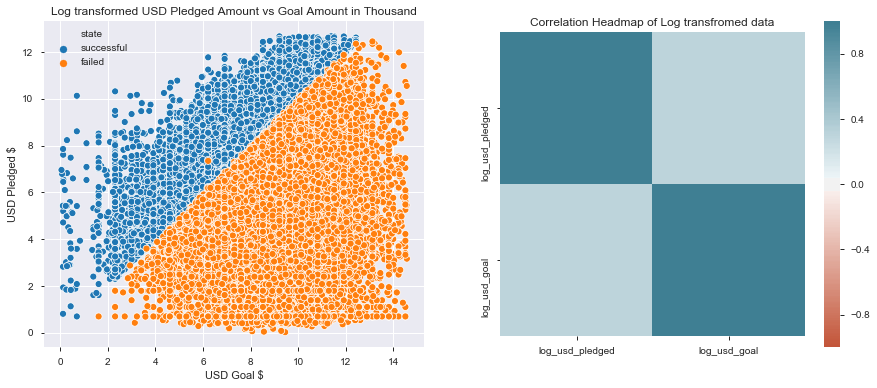

In [78]:
#Correlations and Subplots for Pledge Amount and Goal Amount - log transfomred

#subplot settings
fig, axes = plt.subplots(ncols=2,figsize=(15,6))

#fig.tight_layout()
fig.subplots_adjust(hspace=2)

#correlation matrix 

#df1=df_merge[["usd_pledged","usd_goal"]]
df1=df_data[["log_usd_pledged","log_usd_goal"]]
corr_matrix = df1.corr()


#scatterplot

sns.scatterplot(y="log_usd_pledged", x="log_usd_goal",hue="state", data= df_data, ax=axes[0])
axes[0].set_title('Log transformed USD Pledged Amount vs Goal Amount in Thousand')
axes[0].set_xlabel('USD Goal $')
axes[0].set_ylabel('USD Pledged $')

#correlleogram

sns.heatmap(corr_matrix, vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, ax=axes[1])
axes[1].set_title('Correlation Headmap of Log transfromed data')

print(corr_matrix)

### 2. Correlations and Subplots for Pledged Amount and Timeline - log transformed

                 log_usd_pledged  log_timeline
log_usd_pledged          1.00000       0.00052
log_timeline             0.00052       1.00000


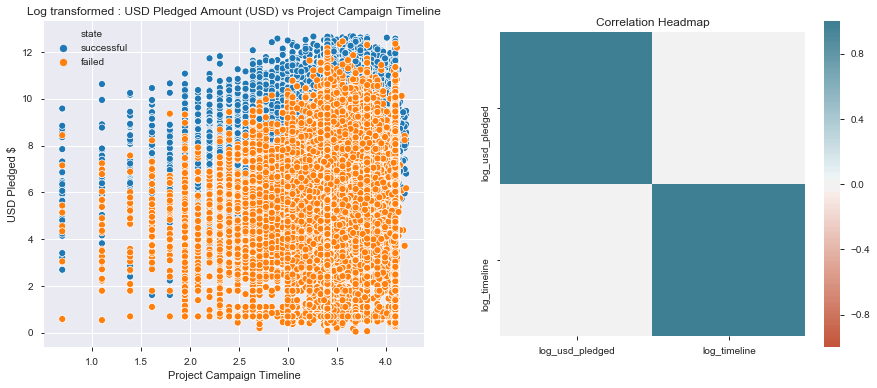

In [79]:
#Correlations and Subplots for Pledge Amount and Timeline - log transformed

#subplot settings
fig, axes = plt.subplots(ncols=2,figsize=(15,6))

#fig.tight_layout()
fig.subplots_adjust(hspace=2)

#correlation matrix 
df2=df_data[["log_usd_pledged","log_timeline"]]
corr_matrix = df2.corr()

#scatterplot

sns.scatterplot(x="log_timeline", y="log_usd_pledged",hue="state", data= df_data, ax=axes[0])
axes[0].set_title('Log transformed : USD Pledged Amount (USD) vs Project Campaign Timeline')
axes[0].set_xlabel('Project Campaign Timeline')
axes[0].set_ylabel('USD Pledged $')

#correlleogram

sns.heatmap(corr_matrix, vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, ax=axes[1])
axes[1].set_title('Correlation Headmap')

print(corr_matrix)

### 3. Correlations and Subplots for Backers and Timeline - log transformed

                   log_backers_count  log_timeline
log_backers_count           1.000000     -0.024068
log_timeline               -0.024068      1.000000


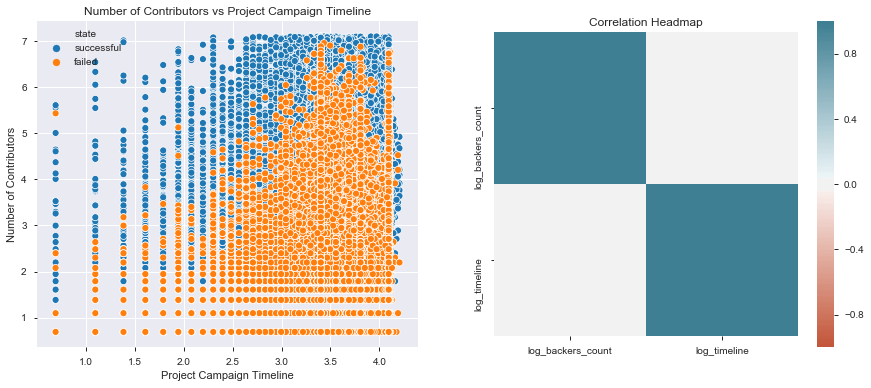

In [80]:
#Correlations and Subplots for Number of Contributors and Timeline - log transformed

#subplot settings
fig, axes = plt.subplots(ncols=2,figsize=(15,6))

#fig.tight_layout()
fig.subplots_adjust(hspace=2)

#correlation matrix 
df3=df_data[["log_backers_count","log_timeline"]] 
corr_matrix = df3.corr()

#scatterplot

sns.scatterplot(x="log_timeline", y="log_backers_count",hue="state", data= df_data, ax=axes[0])
axes[0].set_title('Number of Contributors vs Project Campaign Timeline')
axes[0].set_xlabel('Project Campaign Timeline')
axes[0].set_ylabel('Number of Contributors')

#correlleogram

sns.heatmap(corr_matrix, vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, ax=axes[1])
axes[1].set_title('Correlation Headmap')

print(corr_matrix)

### 4. Correlations and Subplots for Backers and Goal amount - log transformed

                   log_backers_count  log_usd_goal
log_backers_count           1.000000      0.200805
log_usd_goal                0.200805      1.000000


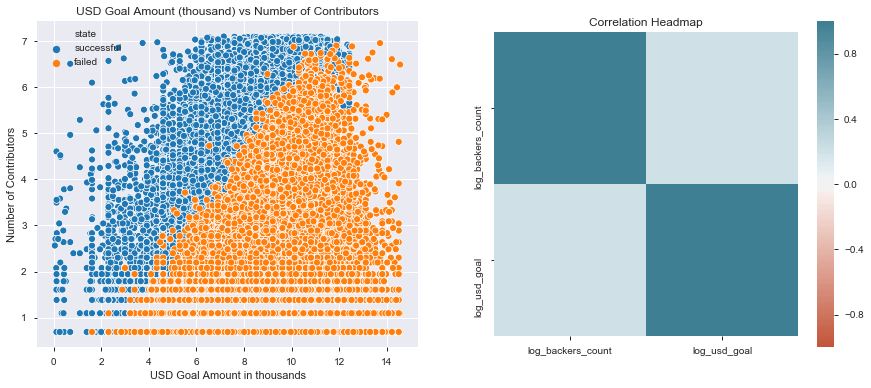

In [81]:
#Correlations and Subplots for Goal Amount and Number of Contributors - log transformed

#subplot settings
fig, axes = plt.subplots(ncols=2,figsize=(15,6))

#fig.tight_layout()
fig.subplots_adjust(hspace=2)

#correlation matrix 
df4=df_data[["log_backers_count","log_usd_goal"]] 
corr_matrix = df4.corr()

#scatterplot

sns.scatterplot(x="log_usd_goal", y="log_backers_count",hue="state", data= df_data, ax=axes[0])
axes[0].set_title('USD Goal Amount (thousand) vs Number of Contributors')
axes[0].set_xlabel('USD Goal Amount in thousands')
axes[0].set_ylabel('Number of Contributors')

#correlleogram

sns.heatmap(corr_matrix, vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, ax=axes[1])
axes[1].set_title('Correlation Headmap')

print(corr_matrix)

# T-test for Successful and Failed Projects

At this point , the volume of projects sucessful and failure is similar at 52% and 40% respectively . With hypothesis testing we want to understand if the features of the success and failure states are statistically different. 

In this test we are testing our hypothesis that Successful Projects have different Goal amounts, Pledged amounts, backers counts and timelines as compared to the Failed Projects. 

In [14]:


ttest, pval = ttest_ind(df_success['usd_goal'], df_fail['usd_goal'])
print("Ttest for goal amounts of Successful and Failed Projects")
print("p-value : ",pval)
print("ttest : ",ttest)


ttest, pval = ttest_ind(df_success['usd_pledged'], df_fail['usd_pledged'])
print("\nTtest for pledged amounts of Successful and Failed Projects")
print("p-value : ",pval)
print("ttest : ",ttest)


ttest, pval = ttest_ind(df_success['backers_count'], df_fail['backers_count'])
print("\nTtest for Backers count of Successful and Failed Projects")
print("p-value : ",pval)
print("ttest : ",ttest)

ttest, pval = ttest_ind(df_success['timeline'], df_fail['timeline'])
print("\nTtest for timeline of Successful and Failed Projects")
print("p-value : ",pval)
print("ttest : ",ttest)

Ttest for goal amounts of Successful and Failed Projects
p-value :  0.0
ttest :  -57.80985402314244

Ttest for pledged amounts of Successful and Failed Projects
p-value :  0.0
ttest :  86.10374928467424

Ttest for Backers count of Successful and Failed Projects
p-value :  0.0
ttest :  135.7781316801086

Ttest for timeline of Successful and Failed Projects
p-value :  0.0
ttest :  -68.81483679505024


### Inference :

The above t-tests show that Successful and Failed projects are statistically different. 

1. The p-values of each t-statistic is less that the level of significance of 5%.  
2. The t-statistic is far from 0 for each of the tests indicating the means are different for each data slice. 

# T-test for Suspended and Cancelled Projects

We have additional status like 'Suspended'and 'Cancelled'. With hypothesis testing we would like to understand how different these two project statuses are as compard to Failed projects. 

In [15]:
#Ttest of failed and cancelled projects 

print(len(df_suspended))
print(len(df_canceled))

ttest, pval = ttest_ind(df_canceled['usd_goal'], df_suspended['usd_goal'])
print("Ttest for goal amounts of Cancelled and Suspended Projects")
print("p-value : ",pval)
print("ttest : ",ttest)


ttest, pval = ttest_ind(df_canceled['usd_pledged'], df_suspended['usd_pledged'])
print("\nTtest for pledged amounts of Cancelled and Suspended Projects")
print("p-value : ",pval)
print("ttest : ",ttest)


ttest, pval = ttest_ind(df_canceled['backers_count'], df_suspended['backers_count'])
print("\nTtest for Backers count of Cancelled and Suspended Projects")
print("p-value : ",pval)
print("ttest : ",ttest)

ttest, pval = ttest_ind(df_canceled['timeline'], df_suspended['timeline'])
print("\nTtest for timeline of Cancelled and Suspended Projects")
print("p-value : ",pval)
print("ttest : ",ttest)

627
8406
Ttest for goal amounts of Cancelled and Suspended Projects
p-value :  0.27745938183698515
ttest :  1.0861098551120814

Ttest for pledged amounts of Cancelled and Suspended Projects
p-value :  0.010037488888105718
ttest :  -2.5750789107701695

Ttest for Backers count of Cancelled and Suspended Projects
p-value :  1.0630623507239479e-06
ttest :  -4.882944053991133

Ttest for timeline of Cancelled and Suspended Projects
p-value :  0.5166432987632072
ttest :  0.6485538264230913


The p-value from the above test gives the probability of observing test results under null hypothesis.The lower the p-value, the lower the probability of obtaining a result like the one that was observed if the null hypothesis was true. Thus, a low p-value indicates decreased support for the null hypothesis.

### Inference :

Although the p-value of cancelled and suspended projects in terms of goal amounts, peldged amounts and backers counts are less than the significance level of 5%, the t-statistic is still not very far apart. 

The timelines of Cancelled and Suspended Projects are statistically significant. 


In the end we would conclude that Cancelled and Suspended Projects are similar. Next we will check how different are they from Failed projects. 


## Logistic Regression 

As per the scatter plots we can see the data doesnot have any linear pattern. Therefore we shall perform Logistic Regression as an intial step for determining the relationship between features and the project status outcome.

C:\Users\Radhika\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Actuals     failed  successful
Predicted                     
failed        4983        2469
successful    9756       16463
Accuracy:  0.6369279201686912


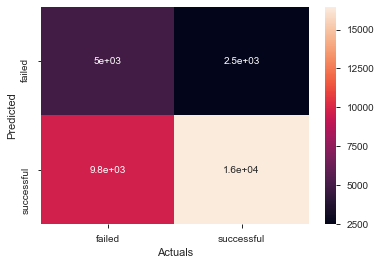

In [20]:
#simple logistic regression 

df_data = pd.concat([df_success,df_fail])

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

train, test = train_test_split(df_data, test_size=0.2, random_state=0)

logistic_regression = LogisticRegression()
logistic_regression.fit(train[['usd_goal','timeline']],train['state']) # training data
state_pred = logistic_regression.predict(test[['usd_goal','timeline']]) # test data df_live

confusion_matrix = pd.crosstab( state_pred, test['state'], rownames=['Predicted'], colnames=['Actuals'])
print(confusion_matrix)

print('Accuracy: ',metrics.accuracy_score(test['state'], state_pred))

sns.heatmap(confusion_matrix, annot=True)

C:\Users\Radhika\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Actuals     failed  successful
Predicted                     
failed        1783         959
successful    7595       18193
Accuracy:  0.7001752541184718


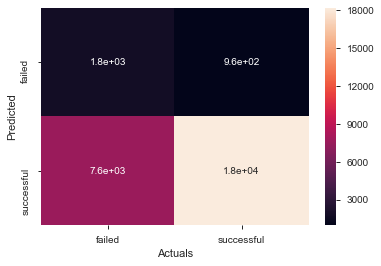

In [23]:
#simple logistic regression 


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

train, test = train_test_split(df_data, test_size=0.2, random_state=0)

logistic_regression = LogisticRegression()
logistic_regression.fit(train[['log_usd_goal','log_timeline']],train['state']) # training data
state_pred = logistic_regression.predict(test[['log_usd_goal','log_timeline']]) # test data df_live

confusion_matrix = pd.crosstab( state_pred, test['state'], rownames=['Predicted'], colnames=['Actuals'])
print(confusion_matrix)

print('Accuracy: ',metrics.accuracy_score(test['state'], state_pred))

sns.heatmap(confusion_matrix, annot=True)

### Inference & Summary of Logistic Regression

As per the results of logistic regression, accuracy of prediction of successful projects is 85.8% which is good.

However the misclassification of failed projects is 60% which is high. 

Logistic regression based on the goal and timeline set by the project owners is not a model with high predictive power. We will need to make some transformations and apply more effective machine learning techniques to improve the accuracy of prediction and reduce the misclassification rate. 

In [128]:
# Logistic regression with cross validation
from sklearn import model_selection

train, test = train_test_split(df_data, test_size=0.2, random_state=0)

kfold = model_selection.KFold(n_splits = 10, random_state=0, shuffle=True)
model_kfold = LogisticRegression()
results_kfold = model_selection.cross_val_score(model_kfold, train[['log_usd_goal','log_timeline']], train['state'], cv=kfold)
print("Training Accuracy : %.2f%%" % (results_kfold.mean()*100.0))
#print(results_kfold)
#print(results_kfold.cv)

results_kfold_pred = model_selection.cross_val_predict(model_kfold, test[['log_usd_goal','log_timeline']], test['state'], cv=kfold)
#print("Accuracy : %.2f%%" % (results_kfold_pred.mean()*100.0))
#print(results_kfold_pred)
confusion_matrix_cv = pd.crosstab( results_kfold_pred, test['state'], rownames=['Predicted'], colnames=['Actuals'])
print(confusion_matrix_cv)
print('Testing Accuracy: ',metrics.accuracy_score(test['state'], results_kfold_pred))


C:\Users\Radhika\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Radhika\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Radhika\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Radhika\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Radhika\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

Training Accuracy : 70.55%


C:\Users\Radhika\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Radhika\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Radhika\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Radhika\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Radhika\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

Actuals     failed  successful
Predicted                     
failed        1795         970
successful    7583       18182
Testing Accuracy:  0.7002103049421662


In [38]:
# Logistic regression with cross validation - all features.
from sklearn import model_selection

train, test = train_test_split(df_data, test_size=0.2, random_state=0)

kfold = model_selection.KFold(n_splits = 10, random_state=0, shuffle=True)
model_kfold = LogisticRegression()
results_kfold = model_selection.cross_val_score(model_kfold, train[['usd_goal','timeline','backers_count']], train['state'], cv=kfold)
print("Training Accuracy : %.2f%%" % (results_kfold.mean()*100.0))
#print(results_kfold)
#print(results_kfold.cv)

results_kfold_pred = model_selection.cross_val_predict(model_kfold, test[['usd_goal','timeline','backers_count']], test['state'], cv=kfold)
#print("Accuracy : %.2f%%" % (results_kfold_pred.mean()*100.0))
#print(results_kfold_pred)
confusion_matrix_cv = pd.crosstab( results_kfold_pred, test['state'], rownames=['Predicted'], colnames=['Actuals'])
print(confusion_matrix_cv)
print('Testing Accuracy: ',metrics.accuracy_score(test['state'], results_kfold_pred))


C:\Users\Radhika\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Radhika\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Radhika\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Radhika\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Radhika\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

Training Accuracy : 92.71%


C:\Users\Radhika\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Radhika\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Radhika\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Radhika\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Radhika\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

Actuals     failed  successful
Predicted                     
failed       13755        1483
successful     984       17449
Accuracy:  0.9267322027857801


In [71]:
#df_data.dtypes
test = df_data['usd_goal']*1000
test=test.round(2)
test.head()

164816      223.73
3826       2500.00
82853     20000.00
99666      1250.00
142475    25000.00
Name: usd_goal, dtype: float64

In [20]:
# linear regression to predict backers count

backers_model = sm.OLS(df_data['log_backers_count'],df_data[['log_usd_goal','log_timeline']]).fit()
#backers_model = sm.OLS(df_data['backers_count'],X_poly).fit()


#lm = linear_model.LinearRegression()
#backers_lm = lm.fit(X,y)

#print('Intercept : ',backers_lm.intercept_)
#print('Coefficients : ',backers_lm.coef_)
#print('Variance score : ',backers_lm.score(X,y))

backers_model.summary()
#backers_lm.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      log_backers_count   R-squared (uncentered):                   0.831
Model:                            OLS   Adj. R-squared (uncentered):              0.831
Method:                 Least Squares   F-statistic:                          3.512e+05
Date:                Tue, 26 Nov 2019   Prob (F-statistic):                        0.00
Time:                        09:52:36   Log-Likelihood:                     -2.7158e+05
No. Observations:              142650   AIC:                                  5.432e+05
Df Residuals:                  142648   BIC:                                  5.432e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
log_usd_goal     0.3188      0.003    123.424      0.000       0.314       0.324
log_timeline     0.2629      0.006     41.083      0.000       0.250       0.275
==============================================================================
Omnibus:                     2096.217   Durbin-Watson:                   0.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2188.685
Skew:                          -0.303   Prob(JB):                         0.00
Kurtosis:                       2.959   Cond. No.                         14.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
# linear regression to predict backers count


train, test = train_test_split(df_data, test_size=0.2, random_state=0)

backers_model = sm.OLS(train['log_backers_count'],train[['log_usd_goal','log_timeline']]).fit()
#backers_model = sm.OLS(df_data['backers_count'],X_poly).fit()


#lm = linear_model.LinearRegression()
#backers_lm = lm.fit(X,y)

#print('Intercept : ',backers_lm.intercept_)
#print('Coefficients : ',backers_lm.coef_)
#print('Variance score : ',backers_lm.score(X,y))

print(backers_model.params)

print(backers_model.summary())
#backers_lm.

pred_backers = backers_model.predict(test[['log_usd_goal','log_timeline']])

# RMSE
print(np.sqrt(metrics.mean_squared_error(test['log_backers_count'], pred_backers)))

#accuracy
print(r2_score(test['log_backers_count'],pred_backers))


log_usd_goal    0.318510
log_timeline    0.263926
dtype: float64
                                 OLS Regression Results                                
Dep. Variable:      log_backers_count   R-squared (uncentered):                   0.831
Model:                            OLS   Adj. R-squared (uncentered):              0.831
Method:                 Least Squares   F-statistic:                          2.814e+05
Date:                Tue, 26 Nov 2019   Prob (F-statistic):                        0.00
Time:                        10:13:10   Log-Likelihood:                     -2.1725e+05
No. Observations:              114120   AIC:                                  4.345e+05
Df Residuals:                  114118   BIC:                                  4.345e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t

NameError: name 'r2_score' is not defined

In [35]:


metrics.r2_score(test['log_backers_count'],pred_backers)

0.040898230413712655

We cannot use Linear regression to predict backers count because the relationship between usd_goal and backers count is not linear

In [31]:
y=test['log_backers_count'][:5]
y

147183    4.077537
52063     3.401197
129458    2.484907
103045    1.609438
26504     0.693147
Name: log_backers_count, dtype: float64

In [32]:
y_hat = pred_backers[:5]
y_hat

147183    2.877079
52063     3.032368
129458    3.079644
103045    2.544236
26504     3.226998
dtype: float64

In [36]:
diff = 
diff

147183    1.200458
52063     0.368829
129458   -0.594738
103045   -0.934798
26504    -2.533851
dtype: float64

In [38]:
diff=diff*diff
diff

147183    1.441101
52063     0.136035
129458    0.353713
103045    0.873847
26504     6.420399
dtype: float64

In [49]:
SS_res = sum( (y - y_hat) **2 )
SS_res

9.22509504819816

In [50]:
import statistics as st
SS_tot = sum(  (y - st.mean(y)) **2  )
SS_tot

7.347896856319055

In [51]:
r2 =  (SS_res / SS_tot)
r2

1.255474216443954

In [41]:


st.mean(diff)

1.8450190096396322

In [80]:
df_data.dtypes

state                object
id                    int64
created_at           object
launched_at          object
timeline              int64
category             object
sub_category         object
city                 object
deadline             object
country              object
currency             object
current_currency     object
fx_rate             float64
usd_goal            float64
web_url              object
rewards_url          object
static_usd_rate     float64
goal                float64
usd_pledged         float64
backers_count         int64
lauchedat_year        int64
lauchedat_month       int64
deadline_year         int64
deadline_month        int64
month_deadline       object
month_launched       object
dtype: object

In [98]:
#Decision Tree for predicting backers count



train, test = train_test_split(df_data, test_size=0.2, random_state=0)
kfold = model_selection.KFold(n_splits = 10, random_state=0, shuffle=True)

X= train[['usd_goal','timeline']]
y= train['backers_count']

reg_tree = DecisionTreeRegressor(random_state=0)
reg_tree.fit(X,y)

#score= np.mean(cross_val_score(reg_tree,test[['usd_goal','timeline']],test['backers_count'],scoring='mean_squared_error',cv=kfold, n_jobs=1 ))

score= cross_val_score(reg_tree,test[['usd_goal','timeline']],test['backers_count'],cv=kfold, n_jobs=1, scoring )

print(score)


[-0.71825158 -0.25028208 -0.28663439 -0.29637577 -0.22506494 -0.27901183
 -0.38350412 -0.37988113 -0.23589405 -0.42628727]


## KNearest Neighbors Model

In [133]:

# setting X and Y
feature =["state"]
y = df_data[feature]
feature =['log_usd_goal','log_timeline']
X = df_data[feature]

#spliting data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# KNN for 10 neighhbours
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train, y_train)

# predict for test data
y_pred = classifier.predict(X_test)

# accuracy of prediction
print(metrics.accuracy_score(y_test, y_pred))

#Classification matrix
print(confusion_matrix( y_pred,y_test, labels=['successful','failed'] ))
#confusion_matrix_knn = pd.crosstab( y_pred, y_test, rownames=['Predicted'], colnames=['Actuals'])
#print(confusion_matrix_knn)
print(classification_report( y_pred,y_test))




C:\Users\Radhika\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


0.6640028040658955
[[14805  5242]
 [ 4344  4139]]
              precision    recall  f1-score   support

      failed       0.44      0.49      0.46      8483
  successful       0.77      0.74      0.76     20047

    accuracy                           0.66     28530
   macro avg       0.61      0.61      0.61     28530
weighted avg       0.67      0.66      0.67     28530



In [112]:
y_test

,state
155275,failed
184644,successful
177016,failed
35002,failed
176125,failed
193036,successful
201509,successful
172519,failed
166816,successful
10296,successful


In [107]:
#optimal k

# try K=1 through K=25 and record testing accuracy
k_range = range(25, 100)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

C:\Users\Radhika\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]
C:\Users\Radhika\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]
C:\Users\Radhika\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]
C:\Users\Radhika\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]
C:\Users\Radhika\Ana

C:\Users\Radhika\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]
C:\Users\Radhika\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]
C:\Users\Radhika\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]
C:\Users\Radhika\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]
C:\Users\Radhika\Ana

C:\Users\Radhika\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]
C:\Users\Radhika\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]
C:\Users\Radhika\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]
C:\Users\Radhika\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]
C:\Users\Radhika\Ana

[0.6359478482967539, 0.6340768019957828, 0.6376406997119183, 0.6354132636393336, 0.6377891954500906, 0.6372843099403047, 0.638709869026759, 0.6383831784027798, 0.6386801698791245, 0.6373140090879392, 0.6379376911882629, 0.6363933355112709, 0.6396899408986962, 0.636333937216002, 0.6381455852217042, 0.6364824329541742, 0.637878292892994, 0.637106115054498, 0.6374031065308425, 0.6365121321018087, 0.6382940809598765, 0.6373437082355736, 0.6410264025422471, 0.6369279201686912, 0.6447090968489204, 0.6409670042469782, 0.6443527070773069, 0.6403433221466543, 0.6442042113391345, 0.6404918178848267, 0.6457782661637611, 0.6439666181580589, 0.6455703721303199, 0.6451842832110718, 0.6459564610495678, 0.6452436815063408, 0.645451575539782, 0.6421549701523567, 0.6453030798016097, 0.6418282795283775, 0.6463425499688159, 0.6425113599239701, 0.6456000712779543, 0.6421846692999911, 0.6452436815063408, 0.6422737667428945, 0.6455703721303199, 0.6428083514003148, 0.6458970627542989, 0.6460752576401058, 0.64

Text(0, 0.5, 'Testing Accuracy')

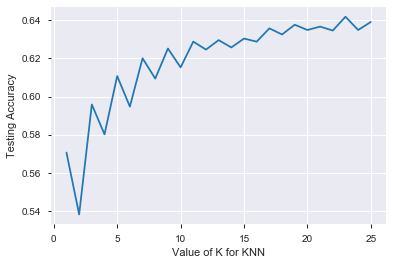

In [104]:
# Scores for all K
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

Text(0, 0.5, 'Testing Accuracy')

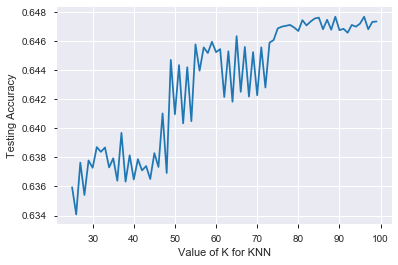

In [108]:
# Scores for all K
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

#### References


1. Group and count : https://stackoverflow.com/questions/47320572/pandas-groupby-and-count
2. Group and count in dataframe : https://stackoverflow.com/questions/10373660/converting-a-pandas-groupby-output-from-series-to-dataframe
3. Pivot table : https://stackoverflow.com/questions/34642180/convert-categorical-data-into-various-columns-for-plotting-in-pandas
4. Drop multilevel index : https://stackoverflow.com/questions/43756052/transform-pandas-pivot-table-to-regular-dataframe
5. Fill na with 0 : https://stackoverflow.com/questions/13295735/how-can-i-replace-all-the-nan-values-with-zeros-in-a-column-of-a-pandas-datafra
6. Stacked plot : https://stackoverflow.com/questions/56251848/how-do-i-make-pandas-catagorical-stacked-bar-chart-scale-to-100
7. Hypothesis Testing : https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce
8. Split data into test and train : https://stackoverflow.com/questions/24147278/how-do-i-create-test-and-train-samples-from-one-dataframe-with-pandas
9. Logistic Regression : https://datatofish.com/logistic-regression-python/
10. Yearly Time series : https://stackoverflow.com/questions/50997339/convert-daily-data-in-pandas-dataframe-to-monthly-data
11. Time Series https://stackoverflow.com/questions/33191857/how-can-i-convert-from-pandas-dataframe-to-timeseries
12. Time Series https://stackoverflow.com/questions/23859840/python-aggregate-by-month-and-calculate-average
13. Resampling https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html